# Coursework 2

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework2.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [ ]:
%load_ext autoreload

%autoreload 2

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

A Jupyter Widget

A Jupyter Widget

Epoch 1: 2.4s to complete
    error(train)=3.78e+00, acc(train)=4.92e-02, error(valid)=3.78e+00, acc(valid)=5.09e-02


A Jupyter Widget

Epoch 2: 5.9s to complete
    error(train)=3.70e+00, acc(train)=8.53e-02, error(valid)=3.70e+00, acc(valid)=8.57e-02


A Jupyter Widget

Epoch 3: 12.0s to complete
    error(train)=3.58e+00, acc(train)=1.31e-01, error(valid)=3.58e+00, acc(valid)=1.27e-01


A Jupyter Widget

Epoch 4: 7.4s to complete
    error(train)=3.41e+00, acc(train)=1.94e-01, error(valid)=3.41e+00, acc(valid)=1.90e-01


A Jupyter Widget

Epoch 5: 6.9s to complete
    error(train)=3.19e+00, acc(train)=2.72e-01, error(valid)=3.20e+00, acc(valid)=2.72e-01


A Jupyter Widget

Epoch 6: 5.4s to complete
    error(train)=2.95e+00, acc(train)=3.30e-01, error(valid)=2.95e+00, acc(valid)=3.34e-01


A Jupyter Widget

Epoch 7: 5.2s to complete
    error(train)=2.71e+00, acc(train)=3.80e-01, error(valid)=2.71e+00, acc(valid)=3.80e-01


A Jupyter Widget

Epoch 8: 5.3s to complete
    error(train)=2.48e+00, acc(train)=4.22e-01, error(valid)=2.49e+00, acc(valid)=4.22e-01


A Jupyter Widget

Epoch 9: 3.9s to complete
    error(train)=2.29e+00, acc(train)=4.55e-01, error(valid)=2.29e+00, acc(valid)=4.54e-01


A Jupyter Widget

Epoch 10: 2.9s to complete
    error(train)=2.13e+00, acc(train)=4.81e-01, error(valid)=2.13e+00, acc(valid)=4.79e-01


A Jupyter Widget

Epoch 11: 2.7s to complete
    error(train)=1.99e+00, acc(train)=5.03e-01, error(valid)=2.00e+00, acc(valid)=4.99e-01


A Jupyter Widget

Epoch 12: 3.0s to complete
    error(train)=1.88e+00, acc(train)=5.20e-01, error(valid)=1.89e+00, acc(valid)=5.17e-01


A Jupyter Widget

Epoch 13: 3.5s to complete
    error(train)=1.80e+00, acc(train)=5.35e-01, error(valid)=1.80e+00, acc(valid)=5.32e-01


A Jupyter Widget

Epoch 14: 3.3s to complete
    error(train)=1.72e+00, acc(train)=5.48e-01, error(valid)=1.73e+00, acc(valid)=5.43e-01


A Jupyter Widget

Epoch 15: 4.3s to complete
    error(train)=1.67e+00, acc(train)=5.59e-01, error(valid)=1.67e+00, acc(valid)=5.54e-01


A Jupyter Widget

Epoch 16: 3.5s to complete
    error(train)=1.62e+00, acc(train)=5.68e-01, error(valid)=1.62e+00, acc(valid)=5.63e-01


A Jupyter Widget

Epoch 17: 3.3s to complete
    error(train)=1.57e+00, acc(train)=5.77e-01, error(valid)=1.58e+00, acc(valid)=5.72e-01


A Jupyter Widget

Epoch 18: 4.6s to complete
    error(train)=1.54e+00, acc(train)=5.85e-01, error(valid)=1.54e+00, acc(valid)=5.80e-01


A Jupyter Widget

Epoch 19: 3.8s to complete
    error(train)=1.51e+00, acc(train)=5.92e-01, error(valid)=1.51e+00, acc(valid)=5.87e-01


A Jupyter Widget

Epoch 20: 2.9s to complete
    error(train)=1.48e+00, acc(train)=5.98e-01, error(valid)=1.48e+00, acc(valid)=5.93e-01


A Jupyter Widget

Epoch 21: 3.8s to complete
    error(train)=1.45e+00, acc(train)=6.03e-01, error(valid)=1.46e+00, acc(valid)=5.99e-01


A Jupyter Widget

Epoch 22: 3.0s to complete
    error(train)=1.43e+00, acc(train)=6.08e-01, error(valid)=1.44e+00, acc(valid)=6.03e-01


A Jupyter Widget

Epoch 23: 3.9s to complete
    error(train)=1.41e+00, acc(train)=6.13e-01, error(valid)=1.42e+00, acc(valid)=6.11e-01


A Jupyter Widget

Epoch 24: 2.7s to complete
    error(train)=1.39e+00, acc(train)=6.18e-01, error(valid)=1.40e+00, acc(valid)=6.15e-01


A Jupyter Widget

Epoch 25: 3.7s to complete
    error(train)=1.38e+00, acc(train)=6.21e-01, error(valid)=1.38e+00, acc(valid)=6.16e-01


A Jupyter Widget

Epoch 26: 3.6s to complete
    error(train)=1.36e+00, acc(train)=6.24e-01, error(valid)=1.37e+00, acc(valid)=6.21e-01


A Jupyter Widget

Epoch 27: 3.2s to complete
    error(train)=1.35e+00, acc(train)=6.28e-01, error(valid)=1.35e+00, acc(valid)=6.24e-01


A Jupyter Widget

Epoch 28: 3.5s to complete
    error(train)=1.33e+00, acc(train)=6.30e-01, error(valid)=1.34e+00, acc(valid)=6.28e-01


A Jupyter Widget

Epoch 29: 4.0s to complete
    error(train)=1.32e+00, acc(train)=6.35e-01, error(valid)=1.33e+00, acc(valid)=6.30e-01


A Jupyter Widget

Epoch 30: 4.2s to complete
    error(train)=1.31e+00, acc(train)=6.38e-01, error(valid)=1.31e+00, acc(valid)=6.33e-01


A Jupyter Widget

Epoch 31: 5.6s to complete
    error(train)=1.30e+00, acc(train)=6.41e-01, error(valid)=1.30e+00, acc(valid)=6.37e-01


A Jupyter Widget

Epoch 32: 4.2s to complete
    error(train)=1.29e+00, acc(train)=6.44e-01, error(valid)=1.29e+00, acc(valid)=6.40e-01


A Jupyter Widget

Epoch 33: 3.9s to complete
    error(train)=1.27e+00, acc(train)=6.47e-01, error(valid)=1.28e+00, acc(valid)=6.43e-01


A Jupyter Widget

Epoch 34: 3.5s to complete
    error(train)=1.26e+00, acc(train)=6.49e-01, error(valid)=1.27e+00, acc(valid)=6.45e-01


A Jupyter Widget

Epoch 35: 3.0s to complete
    error(train)=1.26e+00, acc(train)=6.51e-01, error(valid)=1.26e+00, acc(valid)=6.47e-01


A Jupyter Widget

Epoch 36: 2.8s to complete
    error(train)=1.25e+00, acc(train)=6.54e-01, error(valid)=1.25e+00, acc(valid)=6.49e-01


A Jupyter Widget

Epoch 37: 2.8s to complete
    error(train)=1.24e+00, acc(train)=6.56e-01, error(valid)=1.24e+00, acc(valid)=6.52e-01


A Jupyter Widget

Epoch 38: 2.7s to complete
    error(train)=1.23e+00, acc(train)=6.58e-01, error(valid)=1.24e+00, acc(valid)=6.55e-01


A Jupyter Widget

Epoch 39: 3.3s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.23e+00, acc(valid)=6.58e-01


A Jupyter Widget

Epoch 40: 3.8s to complete
    error(train)=1.21e+00, acc(train)=6.62e-01, error(valid)=1.22e+00, acc(valid)=6.59e-01


A Jupyter Widget

Epoch 41: 3.2s to complete
    error(train)=1.20e+00, acc(train)=6.64e-01, error(valid)=1.21e+00, acc(valid)=6.62e-01


A Jupyter Widget

Epoch 42: 2.7s to complete
    error(train)=1.20e+00, acc(train)=6.66e-01, error(valid)=1.21e+00, acc(valid)=6.61e-01


A Jupyter Widget

Epoch 43: 3.2s to complete
    error(train)=1.19e+00, acc(train)=6.69e-01, error(valid)=1.20e+00, acc(valid)=6.63e-01


A Jupyter Widget

Epoch 44: 4.1s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.66e-01


A Jupyter Widget

Epoch 45: 3.1s to complete
    error(train)=1.18e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


A Jupyter Widget

Epoch 46: 2.9s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.69e-01


A Jupyter Widget

Epoch 47: 3.1s to complete
    error(train)=1.16e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.72e-01


A Jupyter Widget

Epoch 48: 3.0s to complete
    error(train)=1.16e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01


A Jupyter Widget

Epoch 49: 2.8s to complete
    error(train)=1.15e+00, acc(train)=6.78e-01, error(valid)=1.16e+00, acc(valid)=6.76e-01


A Jupyter Widget

Epoch 50: 2.8s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.15e+00, acc(valid)=6.78e-01


A Jupyter Widget

Epoch 51: 2.7s to complete
    error(train)=1.14e+00, acc(train)=6.82e-01, error(valid)=1.15e+00, acc(valid)=6.80e-01


A Jupyter Widget

Epoch 52: 2.7s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.14e+00, acc(valid)=6.81e-01


A Jupyter Widget

Epoch 53: 2.7s to complete
    error(train)=1.12e+00, acc(train)=6.85e-01, error(valid)=1.13e+00, acc(valid)=6.83e-01


A Jupyter Widget

Epoch 54: 2.7s to complete
    error(train)=1.12e+00, acc(train)=6.87e-01, error(valid)=1.13e+00, acc(valid)=6.84e-01


A Jupyter Widget

Epoch 55: 2.8s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.12e+00, acc(valid)=6.85e-01


A Jupyter Widget

Epoch 56: 2.7s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.12e+00, acc(valid)=6.88e-01


A Jupyter Widget

Epoch 57: 2.8s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.11e+00, acc(valid)=6.88e-01


A Jupyter Widget

Epoch 58: 2.7s to complete
    error(train)=1.10e+00, acc(train)=6.92e-01, error(valid)=1.11e+00, acc(valid)=6.90e-01


A Jupyter Widget

Epoch 59: 2.9s to complete
    error(train)=1.09e+00, acc(train)=6.94e-01, error(valid)=1.10e+00, acc(valid)=6.92e-01


A Jupyter Widget

Epoch 60: 2.9s to complete
    error(train)=1.09e+00, acc(train)=6.95e-01, error(valid)=1.10e+00, acc(valid)=6.94e-01


A Jupyter Widget

Epoch 61: 3.0s to complete
    error(train)=1.08e+00, acc(train)=6.96e-01, error(valid)=1.09e+00, acc(valid)=6.95e-01


A Jupyter Widget

Epoch 62: 2.7s to complete
    error(train)=1.08e+00, acc(train)=6.97e-01, error(valid)=1.09e+00, acc(valid)=6.97e-01


A Jupyter Widget

Epoch 63: 3.0s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


A Jupyter Widget

Epoch 64: 2.8s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.08e+00, acc(valid)=6.99e-01


A Jupyter Widget

Epoch 65: 3.1s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


A Jupyter Widget

Epoch 66: 2.9s to complete
    error(train)=1.06e+00, acc(train)=7.02e-01, error(valid)=1.07e+00, acc(valid)=7.01e-01


A Jupyter Widget

Epoch 67: 2.7s to complete
    error(train)=1.05e+00, acc(train)=7.04e-01, error(valid)=1.06e+00, acc(valid)=7.03e-01


A Jupyter Widget

Epoch 68: 3.1s to complete
    error(train)=1.05e+00, acc(train)=7.05e-01, error(valid)=1.06e+00, acc(valid)=7.03e-01


A Jupyter Widget

Epoch 69: 3.8s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.05e+00, acc(valid)=7.04e-01


A Jupyter Widget

Epoch 70: 3.4s to complete
    error(train)=1.04e+00, acc(train)=7.07e-01, error(valid)=1.05e+00, acc(valid)=7.06e-01


A Jupyter Widget

Epoch 71: 3.5s to complete
    error(train)=1.03e+00, acc(train)=7.08e-01, error(valid)=1.04e+00, acc(valid)=7.07e-01


A Jupyter Widget

Epoch 72: 5.1s to complete
    error(train)=1.03e+00, acc(train)=7.09e-01, error(valid)=1.04e+00, acc(valid)=7.07e-01


A Jupyter Widget

Epoch 73: 3.4s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.08e-01


A Jupyter Widget

Epoch 74: 2.6s to complete
    error(train)=1.02e+00, acc(train)=7.12e-01, error(valid)=1.03e+00, acc(valid)=7.10e-01


A Jupyter Widget

Epoch 75: 2.7s to complete
    error(train)=1.01e+00, acc(train)=7.13e-01, error(valid)=1.03e+00, acc(valid)=7.10e-01


A Jupyter Widget

Epoch 76: 3.3s to complete
    error(train)=1.01e+00, acc(train)=7.15e-01, error(valid)=1.02e+00, acc(valid)=7.11e-01


A Jupyter Widget

Epoch 77: 4.6s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.02e+00, acc(valid)=7.12e-01


A Jupyter Widget

Epoch 78: 2.9s to complete
    error(train)=1.00e+00, acc(train)=7.17e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


A Jupyter Widget

Epoch 79: 2.6s to complete
    error(train)=9.96e-01, acc(train)=7.18e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


A Jupyter Widget

Epoch 80: 2.8s to complete
    error(train)=9.92e-01, acc(train)=7.18e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


A Jupyter Widget

Epoch 81: 2.7s to complete
    error(train)=9.88e-01, acc(train)=7.19e-01, error(valid)=1.00e+00, acc(valid)=7.17e-01


A Jupyter Widget

Epoch 82: 2.9s to complete
    error(train)=9.84e-01, acc(train)=7.21e-01, error(valid)=9.98e-01, acc(valid)=7.17e-01


A Jupyter Widget

Epoch 83: 2.8s to complete
    error(train)=9.80e-01, acc(train)=7.22e-01, error(valid)=9.94e-01, acc(valid)=7.18e-01


A Jupyter Widget

Epoch 84: 2.8s to complete
    error(train)=9.76e-01, acc(train)=7.23e-01, error(valid)=9.90e-01, acc(valid)=7.18e-01


A Jupyter Widget

Epoch 85: 2.8s to complete
    error(train)=9.73e-01, acc(train)=7.23e-01, error(valid)=9.87e-01, acc(valid)=7.20e-01


A Jupyter Widget

Epoch 86: 3.0s to complete
    error(train)=9.68e-01, acc(train)=7.25e-01, error(valid)=9.82e-01, acc(valid)=7.20e-01


A Jupyter Widget

Epoch 87: 2.9s to complete
    error(train)=9.64e-01, acc(train)=7.25e-01, error(valid)=9.79e-01, acc(valid)=7.22e-01


A Jupyter Widget

Epoch 88: 2.8s to complete
    error(train)=9.60e-01, acc(train)=7.26e-01, error(valid)=9.75e-01, acc(valid)=7.22e-01


A Jupyter Widget

Epoch 89: 2.7s to complete
    error(train)=9.57e-01, acc(train)=7.27e-01, error(valid)=9.71e-01, acc(valid)=7.22e-01


A Jupyter Widget

Epoch 90: 2.8s to complete
    error(train)=9.53e-01, acc(train)=7.28e-01, error(valid)=9.68e-01, acc(valid)=7.24e-01


A Jupyter Widget

Epoch 91: 3.1s to complete
    error(train)=9.50e-01, acc(train)=7.29e-01, error(valid)=9.65e-01, acc(valid)=7.24e-01


A Jupyter Widget

Epoch 92: 3.0s to complete
    error(train)=9.46e-01, acc(train)=7.30e-01, error(valid)=9.61e-01, acc(valid)=7.24e-01


A Jupyter Widget

Epoch 93: 2.8s to complete
    error(train)=9.43e-01, acc(train)=7.29e-01, error(valid)=9.58e-01, acc(valid)=7.25e-01


A Jupyter Widget

Epoch 94: 3.2s to complete
    error(train)=9.39e-01, acc(train)=7.31e-01, error(valid)=9.54e-01, acc(valid)=7.28e-01


A Jupyter Widget

Epoch 95: 2.9s to complete
    error(train)=9.36e-01, acc(train)=7.32e-01, error(valid)=9.51e-01, acc(valid)=7.27e-01


A Jupyter Widget

Epoch 96: 2.8s to complete
    error(train)=9.32e-01, acc(train)=7.33e-01, error(valid)=9.48e-01, acc(valid)=7.29e-01


A Jupyter Widget

Epoch 97: 2.8s to complete
    error(train)=9.29e-01, acc(train)=7.35e-01, error(valid)=9.44e-01, acc(valid)=7.31e-01


A Jupyter Widget

Epoch 98: 2.8s to complete
    error(train)=9.26e-01, acc(train)=7.36e-01, error(valid)=9.42e-01, acc(valid)=7.31e-01


A Jupyter Widget

Epoch 99: 2.7s to complete
    error(train)=9.22e-01, acc(train)=7.36e-01, error(valid)=9.38e-01, acc(valid)=7.31e-01


A Jupyter Widget

Epoch 100: 3.0s to complete
    error(train)=9.19e-01, acc(train)=7.37e-01, error(valid)=9.36e-01, acc(valid)=7.33e-01


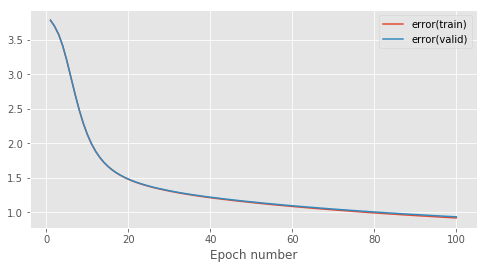

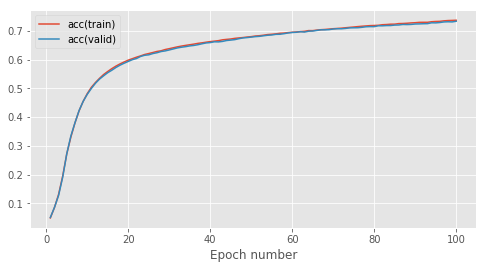

In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

3層

A Jupyter Widget

A Jupyter Widget

Epoch 1: 3.0s to complete
    error(train)=8.98e-01, acc(train)=7.29e-01, error(valid)=9.11e-01, acc(valid)=7.23e-01


A Jupyter Widget

Epoch 2: 3.0s to complete
    error(train)=6.96e-01, acc(train)=7.78e-01, error(valid)=7.22e-01, acc(valid)=7.70e-01


A Jupyter Widget

Epoch 3: 3.0s to complete
    error(train)=5.98e-01, acc(train)=8.03e-01, error(valid)=6.37e-01, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 4: 3.1s to complete
    error(train)=5.43e-01, acc(train)=8.18e-01, error(valid)=5.92e-01, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 5: 2.9s to complete
    error(train)=5.02e-01, acc(train)=8.33e-01, error(valid)=5.59e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 6: 3.0s to complete
    error(train)=4.75e-01, acc(train)=8.38e-01, error(valid)=5.42e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 7: 2.9s to complete
    error(train)=4.65e-01, acc(train)=8.37e-01, error(valid)=5.43e-01, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 8: 3.0s to complete
    error(train)=4.21e-01, acc(train)=8.52e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 9: 2.9s to complete
    error(train)=4.27e-01, acc(train)=8.50e-01, error(valid)=5.25e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 10: 2.9s to complete
    error(train)=4.06e-01, acc(train)=8.56e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 11: 3.0s to complete
    error(train)=3.66e-01, acc(train)=8.71e-01, error(valid)=4.86e-01, acc(valid)=8.38e-01


A Jupyter Widget

Epoch 12: 3.0s to complete
    error(train)=3.80e-01, acc(train)=8.65e-01, error(valid)=5.12e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 13: 3.1s to complete
    error(train)=3.67e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 14: 2.9s to complete
    error(train)=3.51e-01, acc(train)=8.75e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 15: 3.0s to complete
    error(train)=3.36e-01, acc(train)=8.77e-01, error(valid)=4.94e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 16: 3.0s to complete
    error(train)=3.34e-01, acc(train)=8.79e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 17: 3.0s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=4.92e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 18: 2.7s to complete
    error(train)=3.15e-01, acc(train)=8.85e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 19: 3.0s to complete
    error(train)=3.03e-01, acc(train)=8.89e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


A Jupyter Widget

Epoch 20: 2.9s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 21: 2.9s to complete
    error(train)=2.97e-01, acc(train)=8.90e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 22: 2.9s to complete
    error(train)=2.92e-01, acc(train)=8.91e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


A Jupyter Widget

Epoch 23: 2.8s to complete
    error(train)=2.85e-01, acc(train)=8.96e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 24: 2.7s to complete
    error(train)=2.89e-01, acc(train)=8.92e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 25: 2.8s to complete
    error(train)=2.62e-01, acc(train)=9.02e-01, error(valid)=5.01e-01, acc(valid)=8.43e-01


A Jupyter Widget

Epoch 26: 3.0s to complete
    error(train)=2.76e-01, acc(train)=8.95e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 27: 3.0s to complete
    error(train)=2.88e-01, acc(train)=8.90e-01, error(valid)=5.56e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 28: 2.9s to complete
    error(train)=2.58e-01, acc(train)=9.00e-01, error(valid)=5.30e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 29: 3.0s to complete
    error(train)=2.63e-01, acc(train)=8.99e-01, error(valid)=5.59e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 30: 3.0s to complete
    error(train)=2.54e-01, acc(train)=9.02e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 31: 3.0s to complete
    error(train)=2.48e-01, acc(train)=9.04e-01, error(valid)=5.59e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 32: 2.8s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.43e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 33: 2.8s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.82e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 34: 2.9s to complete
    error(train)=2.41e-01, acc(train)=9.06e-01, error(valid)=5.62e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 35: 3.0s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=5.73e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 36: 3.2s to complete
    error(train)=2.36e-01, acc(train)=9.07e-01, error(valid)=5.72e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 37: 3.2s to complete
    error(train)=2.39e-01, acc(train)=9.06e-01, error(valid)=5.94e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 38: 3.2s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 39: 3.0s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 40: 2.9s to complete
    error(train)=2.28e-01, acc(train)=9.09e-01, error(valid)=6.03e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 41: 2.8s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=6.17e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 42: 2.8s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.14e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 43: 2.9s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.13e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 44: 3.0s to complete
    error(train)=2.33e-01, acc(train)=9.07e-01, error(valid)=6.42e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 45: 2.7s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=6.44e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 46: 2.8s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=6.54e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 47: 2.7s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.41e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 48: 2.8s to complete
    error(train)=2.06e-01, acc(train)=9.16e-01, error(valid)=6.59e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 49: 2.8s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.64e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 50: 2.9s to complete
    error(train)=2.30e-01, acc(train)=9.05e-01, error(valid)=6.86e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 51: 2.8s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=6.71e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 52: 2.9s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=7.05e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 53: 3.0s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=6.85e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 54: 2.8s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=6.99e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 55: 2.7s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=6.88e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 56: 2.8s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.16e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 57: 2.6s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.11e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 58: 2.8s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=7.29e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 59: 2.8s to complete
    error(train)=1.89e-01, acc(train)=9.22e-01, error(valid)=7.18e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 60: 2.8s to complete
    error(train)=2.01e-01, acc(train)=9.17e-01, error(valid)=7.50e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 61: 2.7s to complete
    error(train)=2.07e-01, acc(train)=9.15e-01, error(valid)=7.66e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 62: 2.8s to complete
    error(train)=1.88e-01, acc(train)=9.21e-01, error(valid)=7.32e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 63: 3.0s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=7.64e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 64: 4.0s to complete
    error(train)=1.90e-01, acc(train)=9.20e-01, error(valid)=7.59e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 65: 3.2s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=7.70e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 66: 3.6s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.80e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 67: 3.5s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=7.79e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 68: 3.8s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=8.02e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 69: 3.3s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=7.98e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 70: 4.7s to complete
    error(train)=1.84e-01, acc(train)=9.22e-01, error(valid)=8.03e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 71: 4.2s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=8.44e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 72: 8.5s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=8.40e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 73: 3.9s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=8.66e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 74: 4.6s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=8.43e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 75: 5.9s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=8.58e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 76: 3.8s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=8.56e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 77: 3.8s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=8.85e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 78: 3.5s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=8.97e-01, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 79: 3.2s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.61e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 80: 3.0s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=9.05e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 81: 3.2s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.84e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 82: 3.4s to complete
    error(train)=1.72e-01, acc(train)=9.28e-01, error(valid)=8.75e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 83: 3.4s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=9.07e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 84: 3.2s to complete
    error(train)=2.05e-01, acc(train)=9.20e-01, error(valid)=9.69e-01, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 85: 3.0s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=9.16e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 86: 3.0s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=9.25e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 87: 3.8s to complete
    error(train)=1.87e-01, acc(train)=9.25e-01, error(valid)=9.60e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 88: 3.0s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=9.43e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 89: 3.0s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=9.33e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 90: 3.3s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=9.72e-01, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 91: 3.8s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=9.50e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 92: 3.3s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=9.46e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 93: 3.8s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=9.51e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 94: 3.4s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=9.99e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 95: 3.8s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=9.56e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 96: 4.0s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=1.00e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 97: 7.7s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=1.01e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 98: 4.9s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=1.01e+00, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 99: 5.2s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=1.00e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 100: 4.5s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=9.95e-01, acc(valid)=8.17e-01


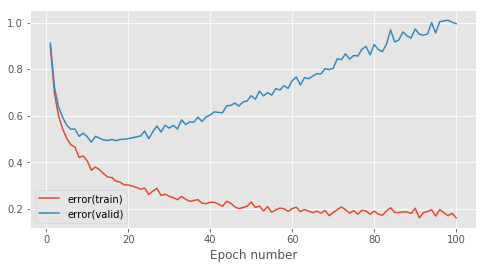

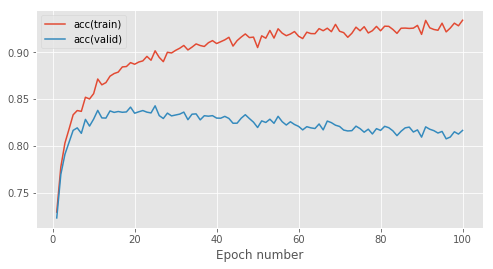

In [5]:

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

SELULayer

A Jupyter Widget

A Jupyter Widget

Epoch 1: 5.5s to complete
    error(train)=9.84e-01, acc(train)=7.14e-01, error(valid)=1.00e+00, acc(valid)=7.08e-01


A Jupyter Widget

Epoch 2: 4.7s to complete
    error(train)=7.77e-01, acc(train)=7.57e-01, error(valid)=8.09e-01, acc(valid)=7.49e-01


A Jupyter Widget

Epoch 3: 4.5s to complete
    error(train)=6.52e-01, acc(train)=7.96e-01, error(valid)=6.93e-01, acc(valid)=7.84e-01


A Jupyter Widget

Epoch 4: 4.1s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=6.37e-01, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 5: 4.8s to complete
    error(train)=5.48e-01, acc(train)=8.21e-01, error(valid)=5.99e-01, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 6: 6.0s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 7: 6.2s to complete
    error(train)=4.94e-01, acc(train)=8.34e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 8: 6.4s to complete
    error(train)=4.75e-01, acc(train)=8.41e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 9: 5.4s to complete
    error(train)=4.45e-01, acc(train)=8.49e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 10: 5.7s to complete
    error(train)=4.48e-01, acc(train)=8.45e-01, error(valid)=5.38e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 11: 4.2s to complete
    error(train)=4.26e-01, acc(train)=8.54e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 12: 5.1s to complete
    error(train)=4.17e-01, acc(train)=8.58e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 13: 7.0s to complete
    error(train)=4.15e-01, acc(train)=8.55e-01, error(valid)=5.23e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 14: 4.1s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 15: 5.1s to complete
    error(train)=3.83e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


A Jupyter Widget

Epoch 16: 4.4s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 17: 5.7s to complete
    error(train)=3.79e-01, acc(train)=8.67e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 18: 4.7s to complete
    error(train)=3.69e-01, acc(train)=8.69e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 19: 5.6s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 20: 5.8s to complete
    error(train)=3.71e-01, acc(train)=8.69e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 21: 4.5s to complete
    error(train)=3.68e-01, acc(train)=8.70e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 22: 3.7s to complete
    error(train)=3.44e-01, acc(train)=8.76e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 23: 5.7s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 24: 4.0s to complete
    error(train)=3.25e-01, acc(train)=8.84e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


A Jupyter Widget

Epoch 25: 4.0s to complete
    error(train)=3.25e-01, acc(train)=8.85e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


A Jupyter Widget

Epoch 26: 4.4s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 27: 4.4s to complete
    error(train)=3.21e-01, acc(train)=8.84e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 28: 4.1s to complete
    error(train)=3.12e-01, acc(train)=8.85e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 29: 3.7s to complete
    error(train)=3.24e-01, acc(train)=8.79e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 30: 4.9s to complete
    error(train)=3.04e-01, acc(train)=8.89e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 31: 7.0s to complete
    error(train)=3.05e-01, acc(train)=8.89e-01, error(valid)=5.36e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 32: 5.0s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 33: 5.0s to complete
    error(train)=2.98e-01, acc(train)=8.91e-01, error(valid)=5.37e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 34: 6.7s to complete
    error(train)=2.89e-01, acc(train)=8.92e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 35: 4.6s to complete
    error(train)=2.80e-01, acc(train)=8.97e-01, error(valid)=5.36e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 36: 4.9s to complete
    error(train)=2.84e-01, acc(train)=8.95e-01, error(valid)=5.40e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 37: 7.3s to complete
    error(train)=2.84e-01, acc(train)=8.94e-01, error(valid)=5.49e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 38: 5.3s to complete
    error(train)=2.81e-01, acc(train)=8.96e-01, error(valid)=5.54e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 39: 4.5s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=5.52e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 40: 3.8s to complete
    error(train)=2.74e-01, acc(train)=8.96e-01, error(valid)=5.58e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 41: 3.7s to complete
    error(train)=2.62e-01, acc(train)=9.02e-01, error(valid)=5.49e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 42: 3.7s to complete
    error(train)=2.71e-01, acc(train)=8.97e-01, error(valid)=5.64e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 43: 3.7s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=5.76e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 44: 4.0s to complete
    error(train)=2.63e-01, acc(train)=9.00e-01, error(valid)=5.74e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 45: 4.5s to complete
    error(train)=2.49e-01, acc(train)=9.07e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 46: 5.3s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=5.78e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 47: 4.0s to complete
    error(train)=2.57e-01, acc(train)=9.01e-01, error(valid)=5.81e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 48: 5.0s to complete
    error(train)=2.66e-01, acc(train)=8.96e-01, error(valid)=5.97e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 49: 6.4s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=5.85e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 50: 4.7s to complete
    error(train)=2.59e-01, acc(train)=8.98e-01, error(valid)=6.00e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 51: 4.1s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=6.16e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 52: 6.0s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=5.96e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 53: 6.8s to complete
    error(train)=2.43e-01, acc(train)=9.05e-01, error(valid)=6.00e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 54: 5.0s to complete
    error(train)=2.38e-01, acc(train)=9.09e-01, error(valid)=6.04e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 55: 4.2s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=6.22e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 56: 4.6s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=6.10e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 57: 3.8s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=6.35e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 58: 4.3s to complete
    error(train)=2.37e-01, acc(train)=9.07e-01, error(valid)=6.46e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 59: 3.5s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=6.31e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 60: 4.2s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=6.43e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 61: 4.2s to complete
    error(train)=2.27e-01, acc(train)=9.14e-01, error(valid)=6.44e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 62: 4.4s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=6.52e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 63: 3.5s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=6.37e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 64: 4.2s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=6.53e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 65: 3.8s to complete
    error(train)=2.19e-01, acc(train)=9.16e-01, error(valid)=6.47e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 66: 7.0s to complete
    error(train)=2.25e-01, acc(train)=9.07e-01, error(valid)=6.71e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 67: 5.8s to complete
    error(train)=2.20e-01, acc(train)=9.14e-01, error(valid)=6.73e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 68: 5.0s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=6.74e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 69: 4.3s to complete
    error(train)=2.24e-01, acc(train)=9.13e-01, error(valid)=6.92e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 70: 3.7s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.77e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 71: 3.9s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.85e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 72: 3.8s to complete
    error(train)=2.22e-01, acc(train)=9.11e-01, error(valid)=7.09e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 73: 3.7s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.96e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 74: 3.9s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=6.99e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 75: 4.2s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 76: 5.0s to complete
    error(train)=2.25e-01, acc(train)=9.12e-01, error(valid)=7.41e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 77: 4.1s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=7.03e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 78: 5.7s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.07e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 79: 5.6s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=7.42e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 80: 7.0s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=7.44e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 81: 4.8s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=7.53e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 82: 4.6s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=7.33e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 83: 4.5s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=7.44e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 84: 4.3s to complete
    error(train)=2.00e-01, acc(train)=9.18e-01, error(valid)=7.58e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 85: 4.4s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.63e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 86: 4.6s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=7.73e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 87: 4.2s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=7.73e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 88: 4.4s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=7.97e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 89: 4.5s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=7.91e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 90: 4.5s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.84e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 91: 3.9s to complete
    error(train)=2.10e-01, acc(train)=9.14e-01, error(valid)=8.13e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 92: 5.4s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=8.05e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 93: 5.8s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=8.21e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 94: 3.6s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.95e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 95: 3.9s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=8.27e-01, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 96: 3.8s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=8.13e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 97: 3.6s to complete
    error(train)=1.72e-01, acc(train)=9.31e-01, error(valid)=8.10e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 98: 3.5s to complete
    error(train)=1.72e-01, acc(train)=9.31e-01, error(valid)=8.24e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 99: 3.3s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=8.42e-01, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 100: 3.3s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=8.44e-01, acc(valid)=8.13e-01


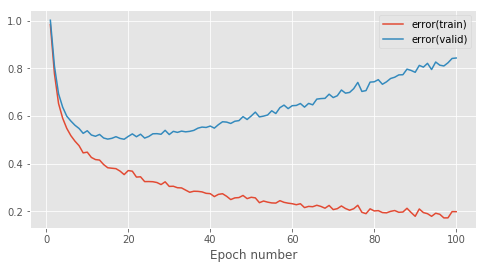

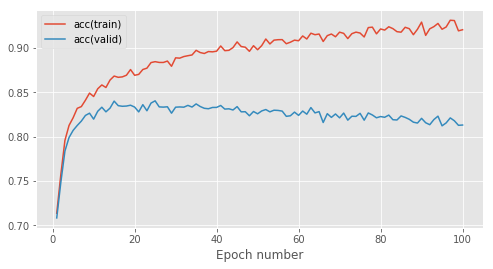

In [6]:

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

MomentumLearningRule

A Jupyter Widget

A Jupyter Widget

Epoch 1: 3.6s to complete
    error(train)=1.58e+00, acc(train)=5.78e-01, error(valid)=1.58e+00, acc(valid)=5.82e-01


A Jupyter Widget

Epoch 2: 3.6s to complete
    error(train)=1.32e+00, acc(train)=6.33e-01, error(valid)=1.32e+00, acc(valid)=6.33e-01


A Jupyter Widget

Epoch 3: 3.5s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.22e+00, acc(valid)=6.56e-01


A Jupyter Widget

Epoch 4: 3.7s to complete
    error(train)=1.16e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01


A Jupyter Widget

Epoch 5: 3.5s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01


A Jupyter Widget

Epoch 6: 3.5s to complete
    error(train)=1.06e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


A Jupyter Widget

Epoch 7: 3.7s to complete
    error(train)=1.02e+00, acc(train)=7.13e-01, error(valid)=1.03e+00, acc(valid)=7.07e-01


A Jupyter Widget

Epoch 8: 3.6s to complete
    error(train)=9.80e-01, acc(train)=7.22e-01, error(valid)=9.95e-01, acc(valid)=7.16e-01


A Jupyter Widget

Epoch 9: 3.5s to complete
    error(train)=9.42e-01, acc(train)=7.32e-01, error(valid)=9.58e-01, acc(valid)=7.25e-01


A Jupyter Widget

Epoch 10: 3.6s to complete
    error(train)=9.08e-01, acc(train)=7.41e-01, error(valid)=9.26e-01, acc(valid)=7.34e-01


A Jupyter Widget

Epoch 11: 3.6s to complete
    error(train)=8.79e-01, acc(train)=7.48e-01, error(valid)=8.99e-01, acc(valid)=7.41e-01


A Jupyter Widget

Epoch 12: 4.4s to complete
    error(train)=8.51e-01, acc(train)=7.54e-01, error(valid)=8.71e-01, acc(valid)=7.48e-01


A Jupyter Widget

Epoch 13: 3.8s to complete
    error(train)=8.24e-01, acc(train)=7.62e-01, error(valid)=8.47e-01, acc(valid)=7.53e-01


A Jupyter Widget

Epoch 14: 3.8s to complete
    error(train)=8.00e-01, acc(train)=7.67e-01, error(valid)=8.24e-01, acc(valid)=7.61e-01


A Jupyter Widget

Epoch 15: 3.5s to complete
    error(train)=7.79e-01, acc(train)=7.72e-01, error(valid)=8.05e-01, acc(valid)=7.63e-01


A Jupyter Widget

Epoch 16: 3.5s to complete
    error(train)=7.58e-01, acc(train)=7.78e-01, error(valid)=7.86e-01, acc(valid)=7.68e-01


A Jupyter Widget

Epoch 17: 3.6s to complete
    error(train)=7.42e-01, acc(train)=7.81e-01, error(valid)=7.69e-01, acc(valid)=7.73e-01


A Jupyter Widget

Epoch 18: 3.7s to complete
    error(train)=7.23e-01, acc(train)=7.85e-01, error(valid)=7.53e-01, acc(valid)=7.74e-01


A Jupyter Widget

Epoch 19: 3.7s to complete
    error(train)=7.09e-01, acc(train)=7.89e-01, error(valid)=7.40e-01, acc(valid)=7.76e-01


A Jupyter Widget

Epoch 20: 3.7s to complete
    error(train)=6.95e-01, acc(train)=7.93e-01, error(valid)=7.27e-01, acc(valid)=7.81e-01


A Jupyter Widget

Epoch 21: 3.6s to complete
    error(train)=6.82e-01, acc(train)=7.95e-01, error(valid)=7.16e-01, acc(valid)=7.85e-01


A Jupyter Widget

Epoch 22: 3.7s to complete
    error(train)=6.69e-01, acc(train)=7.98e-01, error(valid)=7.04e-01, acc(valid)=7.86e-01


A Jupyter Widget

Epoch 23: 3.6s to complete
    error(train)=6.58e-01, acc(train)=8.01e-01, error(valid)=6.95e-01, acc(valid)=7.89e-01


A Jupyter Widget

Epoch 24: 3.6s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=6.84e-01, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 25: 3.7s to complete
    error(train)=6.36e-01, acc(train)=8.07e-01, error(valid)=6.75e-01, acc(valid)=7.92e-01


A Jupyter Widget

Epoch 26: 3.7s to complete
    error(train)=6.27e-01, acc(train)=8.09e-01, error(valid)=6.69e-01, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 27: 3.6s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 28: 3.5s to complete
    error(train)=6.12e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 29: 3.7s to complete
    error(train)=6.04e-01, acc(train)=8.15e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 30: 3.9s to complete
    error(train)=5.92e-01, acc(train)=8.18e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 31: 3.8s to complete
    error(train)=5.86e-01, acc(train)=8.20e-01, error(valid)=6.33e-01, acc(valid)=8.05e-01


A Jupyter Widget

Epoch 32: 3.9s to complete
    error(train)=5.80e-01, acc(train)=8.22e-01, error(valid)=6.27e-01, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 33: 3.8s to complete
    error(train)=5.73e-01, acc(train)=8.24e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 34: 3.8s to complete
    error(train)=5.68e-01, acc(train)=8.24e-01, error(valid)=6.18e-01, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 35: 3.6s to complete
    error(train)=5.62e-01, acc(train)=8.25e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 36: 3.7s to complete
    error(train)=5.53e-01, acc(train)=8.29e-01, error(valid)=6.05e-01, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 37: 3.8s to complete
    error(train)=5.49e-01, acc(train)=8.30e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 38: 3.6s to complete
    error(train)=5.43e-01, acc(train)=8.31e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 39: 3.6s to complete
    error(train)=5.38e-01, acc(train)=8.32e-01, error(valid)=5.94e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 40: 3.7s to complete
    error(train)=5.33e-01, acc(train)=8.34e-01, error(valid)=5.92e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 41: 3.8s to complete
    error(train)=5.28e-01, acc(train)=8.35e-01, error(valid)=5.85e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 42: 3.8s to complete
    error(train)=5.24e-01, acc(train)=8.36e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 43: 3.5s to complete
    error(train)=5.19e-01, acc(train)=8.38e-01, error(valid)=5.79e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 44: 3.6s to complete
    error(train)=5.16e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 45: 3.7s to complete
    error(train)=5.12e-01, acc(train)=8.39e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 46: 3.5s to complete
    error(train)=5.07e-01, acc(train)=8.40e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 47: 3.7s to complete
    error(train)=5.03e-01, acc(train)=8.42e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 48: 3.6s to complete
    error(train)=4.99e-01, acc(train)=8.42e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 49: 3.6s to complete
    error(train)=4.96e-01, acc(train)=8.43e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 50: 3.6s to complete
    error(train)=4.92e-01, acc(train)=8.45e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 51: 3.6s to complete
    error(train)=4.89e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 52: 3.9s to complete
    error(train)=4.86e-01, acc(train)=8.45e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 53: 3.6s to complete
    error(train)=4.82e-01, acc(train)=8.47e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 54: 3.5s to complete
    error(train)=4.78e-01, acc(train)=8.48e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 55: 3.5s to complete
    error(train)=4.75e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 56: 3.6s to complete
    error(train)=4.72e-01, acc(train)=8.50e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 57: 4.1s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.49e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 58: 3.6s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 59: 3.6s to complete
    error(train)=4.64e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 60: 3.5s to complete
    error(train)=4.61e-01, acc(train)=8.52e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 61: 3.8s to complete
    error(train)=4.60e-01, acc(train)=8.51e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 62: 3.5s to complete
    error(train)=4.54e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 63: 3.6s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 64: 3.6s to complete
    error(train)=4.51e-01, acc(train)=8.55e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 65: 3.6s to complete
    error(train)=4.49e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 66: 3.5s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 67: 3.5s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 68: 3.5s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 69: 3.5s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 70: 3.6s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 71: 3.5s to complete
    error(train)=4.32e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 72: 3.8s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 73: 4.0s to complete
    error(train)=4.29e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 74: 4.2s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 75: 4.1s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 76: 3.6s to complete
    error(train)=4.24e-01, acc(train)=8.62e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 77: 3.6s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 78: 3.5s to complete
    error(train)=4.19e-01, acc(train)=8.63e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 79: 3.5s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 80: 3.6s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 81: 3.6s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 82: 3.5s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 83: 3.6s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 84: 3.6s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 85: 4.0s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 86: 3.5s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 87: 3.6s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 88: 3.6s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 89: 3.7s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 90: 3.5s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 91: 3.6s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 92: 3.6s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 93: 3.5s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 94: 3.5s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 95: 3.7s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 96: 3.8s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 97: 3.5s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


A Jupyter Widget

Epoch 98: 3.5s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 99: 3.6s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 100: 3.6s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


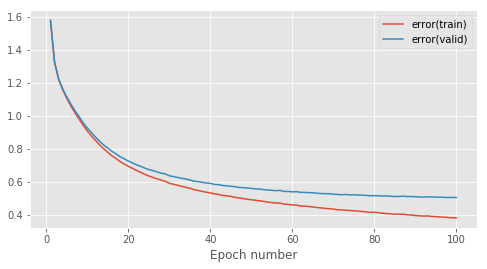

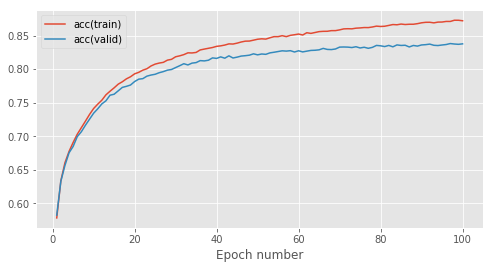

In [7]:

#setup hyperparameters
# learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = MomentumLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

RMSPropLearningRule

A Jupyter Widget

A Jupyter Widget

Epoch 1: 4.0s to complete
    error(train)=7.58e-01, acc(train)=7.68e-01, error(valid)=7.86e-01, acc(valid)=7.61e-01


A Jupyter Widget

Epoch 2: 4.2s to complete
    error(train)=6.40e-01, acc(train)=7.95e-01, error(valid)=6.78e-01, acc(valid)=7.83e-01


A Jupyter Widget

Epoch 3: 3.8s to complete
    error(train)=5.44e-01, acc(train)=8.24e-01, error(valid)=6.01e-01, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 4: 3.8s to complete
    error(train)=5.01e-01, acc(train)=8.36e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 5: 3.9s to complete
    error(train)=4.78e-01, acc(train)=8.39e-01, error(valid)=5.58e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 6: 3.8s to complete
    error(train)=4.50e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 7: 4.1s to complete
    error(train)=4.30e-01, acc(train)=8.53e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 8: 5.0s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=5.20e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 9: 7.4s to complete
    error(train)=3.91e-01, acc(train)=8.63e-01, error(valid)=5.29e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 10: 6.3s to complete
    error(train)=3.82e-01, acc(train)=8.64e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 11: 5.7s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 12: 4.9s to complete
    error(train)=3.40e-01, acc(train)=8.80e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 13: 4.8s to complete
    error(train)=3.33e-01, acc(train)=8.82e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 14: 4.7s to complete
    error(train)=3.34e-01, acc(train)=8.79e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 15: 4.6s to complete
    error(train)=3.14e-01, acc(train)=8.87e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 16: 4.7s to complete
    error(train)=3.17e-01, acc(train)=8.86e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


A Jupyter Widget

Epoch 17: 4.4s to complete
    error(train)=3.00e-01, acc(train)=8.91e-01, error(valid)=5.38e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 18: 4.7s to complete
    error(train)=3.02e-01, acc(train)=8.90e-01, error(valid)=5.41e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 19: 4.5s to complete
    error(train)=2.90e-01, acc(train)=8.94e-01, error(valid)=5.45e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 20: 4.3s to complete
    error(train)=2.90e-01, acc(train)=8.93e-01, error(valid)=5.57e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 21: 4.7s to complete
    error(train)=2.98e-01, acc(train)=8.89e-01, error(valid)=5.70e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 22: 4.6s to complete
    error(train)=2.86e-01, acc(train)=8.93e-01, error(valid)=5.65e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 23: 4.4s to complete
    error(train)=2.73e-01, acc(train)=8.98e-01, error(valid)=5.68e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 24: 4.6s to complete
    error(train)=2.63e-01, acc(train)=9.03e-01, error(valid)=5.66e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 25: 4.5s to complete
    error(train)=2.61e-01, acc(train)=9.02e-01, error(valid)=5.81e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 26: 4.4s to complete
    error(train)=2.49e-01, acc(train)=9.07e-01, error(valid)=5.70e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 27: 5.1s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=5.99e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 28: 6.4s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=5.94e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 29: 4.9s to complete
    error(train)=2.44e-01, acc(train)=9.08e-01, error(valid)=6.09e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 30: 4.7s to complete
    error(train)=2.46e-01, acc(train)=9.06e-01, error(valid)=6.13e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 31: 4.7s to complete
    error(train)=2.45e-01, acc(train)=9.07e-01, error(valid)=6.26e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 32: 4.7s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=6.48e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 33: 4.9s to complete
    error(train)=2.26e-01, acc(train)=9.14e-01, error(valid)=6.32e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 34: 5.8s to complete
    error(train)=2.32e-01, acc(train)=9.11e-01, error(valid)=6.56e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 35: 5.4s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=6.75e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 36: 5.1s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=6.67e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 37: 4.9s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=6.79e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 38: 5.4s to complete
    error(train)=2.13e-01, acc(train)=9.19e-01, error(valid)=6.73e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 39: 8.2s to complete
    error(train)=2.06e-01, acc(train)=9.21e-01, error(valid)=6.86e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 40: 8.4s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=7.25e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 41: 5.2s to complete
    error(train)=2.10e-01, acc(train)=9.19e-01, error(valid)=7.15e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 42: 5.3s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=7.12e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 43: 5.7s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=7.38e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 44: 5.4s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=7.54e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 45: 6.1s to complete
    error(train)=1.92e-01, acc(train)=9.26e-01, error(valid)=7.37e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 46: 4.0s to complete
    error(train)=1.91e-01, acc(train)=9.26e-01, error(valid)=7.51e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 47: 4.9s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=7.71e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 48: 4.1s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=7.78e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 49: 5.0s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.92e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 50: 7.0s to complete
    error(train)=1.92e-01, acc(train)=9.25e-01, error(valid)=8.19e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 51: 7.3s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=8.11e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 52: 6.2s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=8.27e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 53: 6.0s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=8.38e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 54: 6.8s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.40e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 55: 5.5s to complete
    error(train)=1.77e-01, acc(train)=9.30e-01, error(valid)=8.44e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 56: 5.4s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=8.47e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 57: 5.7s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=8.66e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 58: 5.3s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=8.84e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 59: 5.4s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=8.76e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 60: 5.5s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=9.37e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 61: 5.0s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=9.24e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 62: 4.4s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=9.33e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 63: 4.7s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=9.45e-01, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 64: 5.3s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=9.38e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 65: 4.9s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=9.64e-01, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 66: 7.2s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=9.86e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 67: 5.7s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=1.00e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 68: 5.0s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=9.92e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 69: 5.8s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=9.94e-01, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 70: 5.8s to complete
    error(train)=1.57e-01, acc(train)=9.37e-01, error(valid)=1.02e+00, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 71: 5.9s to complete
    error(train)=1.61e-01, acc(train)=9.36e-01, error(valid)=1.05e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 72: 4.9s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=1.05e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 73: 6.9s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=1.09e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 74: 4.3s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=1.07e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 75: 5.3s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=1.09e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 76: 4.5s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=1.09e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 77: 5.5s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=1.11e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 78: 4.3s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=1.13e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 79: 4.4s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=1.11e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 80: 6.1s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.14e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 81: 6.8s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=1.14e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 82: 5.7s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.18e+00, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 83: 5.3s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=1.18e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 84: 5.8s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.16e+00, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 85: 4.2s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=1.20e+00, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 86: 5.2s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=1.22e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 87: 4.8s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=1.20e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 88: 5.3s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=1.23e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 89: 5.3s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.23e+00, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 90: 5.0s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.25e+00, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 91: 5.0s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.25e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 92: 6.3s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.28e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 93: 5.4s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.32e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 94: 6.0s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.34e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 95: 5.5s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.29e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 96: 5.8s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.32e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 97: 4.4s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.32e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 98: 4.7s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=1.36e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 99: 5.0s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.34e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 100: 4.6s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.35e+00, acc(valid)=8.06e-01


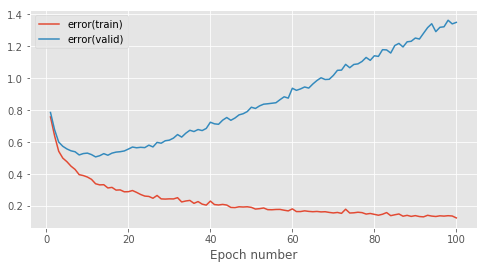

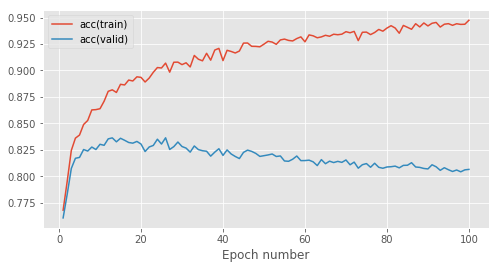

In [8]:
#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

Adam

A Jupyter Widget

A Jupyter Widget

Epoch 1: 6.1s to complete
    error(train)=8.24e-01, acc(train)=7.53e-01, error(valid)=8.43e-01, acc(valid)=7.47e-01


A Jupyter Widget

Epoch 2: 6.4s to complete
    error(train)=6.77e-01, acc(train)=7.87e-01, error(valid)=7.16e-01, acc(valid)=7.77e-01


A Jupyter Widget

Epoch 3: 7.1s to complete
    error(train)=5.72e-01, acc(train)=8.13e-01, error(valid)=6.25e-01, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 4: 4.9s to complete
    error(train)=5.13e-01, acc(train)=8.33e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 5: 4.7s to complete
    error(train)=4.84e-01, acc(train)=8.40e-01, error(valid)=5.65e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 6: 5.3s to complete
    error(train)=4.50e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 7: 4.9s to complete
    error(train)=4.34e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 8: 5.2s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 9: 4.5s to complete
    error(train)=3.95e-01, acc(train)=8.65e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 10: 4.4s to complete
    error(train)=3.88e-01, acc(train)=8.66e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 11: 4.1s to complete
    error(train)=3.69e-01, acc(train)=8.72e-01, error(valid)=5.20e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 12: 4.1s to complete
    error(train)=3.63e-01, acc(train)=8.71e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 13: 4.1s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


A Jupyter Widget

Epoch 14: 4.3s to complete
    error(train)=3.37e-01, acc(train)=8.81e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 15: 4.0s to complete
    error(train)=3.38e-01, acc(train)=8.78e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 16: 4.1s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 17: 4.2s to complete
    error(train)=3.19e-01, acc(train)=8.83e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 18: 4.7s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 19: 4.8s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 20: 4.2s to complete
    error(train)=3.02e-01, acc(train)=8.89e-01, error(valid)=5.56e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 21: 4.2s to complete
    error(train)=2.96e-01, acc(train)=8.91e-01, error(valid)=5.58e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 22: 4.2s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=5.60e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 23: 4.1s to complete
    error(train)=2.95e-01, acc(train)=8.91e-01, error(valid)=5.75e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 24: 5.9s to complete
    error(train)=2.62e-01, acc(train)=9.02e-01, error(valid)=5.58e-01, acc(valid)=8.33e-01


A Jupyter Widget

Epoch 25: 6.0s to complete
    error(train)=2.75e-01, acc(train)=8.95e-01, error(valid)=5.77e-01, acc(valid)=8.27e-01


A Jupyter Widget

Epoch 26: 7.3s to complete
    error(train)=2.59e-01, acc(train)=9.02e-01, error(valid)=5.71e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 27: 7.2s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=5.89e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 28: 6.3s to complete
    error(train)=2.56e-01, acc(train)=9.04e-01, error(valid)=6.02e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 29: 5.6s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.94e-01, acc(valid)=8.31e-01


A Jupyter Widget

Epoch 30: 5.0s to complete
    error(train)=2.45e-01, acc(train)=9.05e-01, error(valid)=6.07e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 31: 4.3s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=6.07e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 32: 4.2s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=6.19e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 33: 4.2s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=6.25e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 34: 5.4s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=6.48e-01, acc(valid)=8.24e-01


A Jupyter Widget

Epoch 35: 4.5s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=6.41e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 36: 5.0s to complete
    error(train)=2.25e-01, acc(train)=9.12e-01, error(valid)=6.53e-01, acc(valid)=8.25e-01


A Jupyter Widget

Epoch 37: 4.2s to complete
    error(train)=2.24e-01, acc(train)=9.13e-01, error(valid)=6.54e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 38: 5.5s to complete
    error(train)=2.28e-01, acc(train)=9.08e-01, error(valid)=6.71e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 39: 4.3s to complete
    error(train)=2.18e-01, acc(train)=9.15e-01, error(valid)=6.77e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 40: 5.5s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=6.91e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 41: 5.6s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=6.93e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 42: 4.1s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.93e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 43: 4.4s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=7.04e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 44: 4.3s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=7.32e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 45: 4.2s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=7.34e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 46: 6.3s to complete
    error(train)=2.02e-01, acc(train)=9.20e-01, error(valid)=7.35e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 47: 5.9s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.47e-01, acc(valid)=8.20e-01


A Jupyter Widget

Epoch 48: 4.2s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.37e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 49: 4.7s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.47e-01, acc(valid)=8.26e-01


A Jupyter Widget

Epoch 50: 5.5s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=7.56e-01, acc(valid)=8.23e-01


A Jupyter Widget

Epoch 51: 4.1s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=7.97e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 52: 7.7s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.77e-01, acc(valid)=8.18e-01


A Jupyter Widget

Epoch 53: 4.3s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=8.16e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 54: 4.4s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=8.01e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 55: 4.6s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=8.16e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 56: 4.3s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.28e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 57: 5.0s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=8.53e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 58: 6.0s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=8.31e-01, acc(valid)=8.21e-01


A Jupyter Widget

Epoch 59: 5.0s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=8.64e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 60: 5.2s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=8.73e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 61: 5.5s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=8.73e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 62: 4.6s to complete
    error(train)=1.69e-01, acc(train)=9.32e-01, error(valid)=8.72e-01, acc(valid)=8.17e-01


A Jupyter Widget

Epoch 63: 4.0s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=8.82e-01, acc(valid)=8.15e-01


A Jupyter Widget

Epoch 64: 4.8s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=9.22e-01, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 65: 4.8s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=9.11e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 66: 4.8s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=9.47e-01, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 67: 4.9s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=9.48e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 68: 4.3s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=9.40e-01, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 69: 6.1s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=9.50e-01, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 70: 4.5s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=9.52e-01, acc(valid)=8.16e-01


A Jupyter Widget

Epoch 71: 5.3s to complete
    error(train)=1.71e-01, acc(train)=9.29e-01, error(valid)=9.68e-01, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 72: 4.3s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=9.90e-01, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 73: 4.3s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=1.02e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 74: 4.6s to complete
    error(train)=1.55e-01, acc(train)=9.35e-01, error(valid)=9.93e-01, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 75: 4.2s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=1.03e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 76: 4.3s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=9.99e-01, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 77: 4.7s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=1.01e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 78: 7.6s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=1.04e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 79: 5.7s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=1.06e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 80: 6.1s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=1.06e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 81: 6.5s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=1.05e+00, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 82: 4.7s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.06e+00, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 83: 4.4s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=1.08e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 84: 4.3s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=1.11e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 85: 4.5s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.10e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 86: 5.2s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.11e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 87: 4.0s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.11e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 88: 4.8s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.15e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 89: 5.6s to complete
    error(train)=1.54e-01, acc(train)=9.36e-01, error(valid)=1.13e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 90: 6.0s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=1.15e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 91: 5.5s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=1.16e+00, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 92: 5.0s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=1.16e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 93: 5.4s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=1.16e+00, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 94: 5.7s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.21e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 95: 5.3s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=1.22e+00, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 96: 5.8s to complete
    error(train)=1.53e-01, acc(train)=9.39e-01, error(valid)=1.22e+00, acc(valid)=8.10e-01


A Jupyter Widget

Epoch 97: 5.7s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=1.23e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 98: 6.3s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.20e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 99: 6.1s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.23e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 100: 5.0s to complete
    error(train)=1.46e-01, acc(train)=9.39e-01, error(valid)=1.25e+00, acc(valid)=8.04e-01


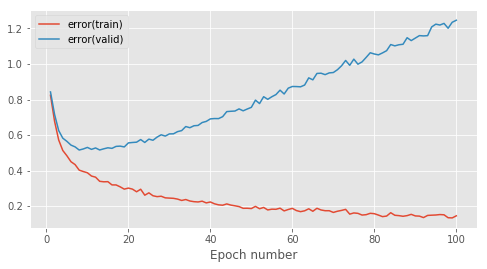

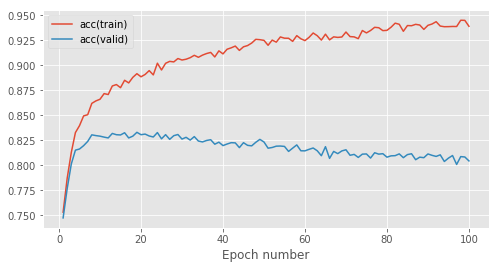

In [9]:

#setup hyperparameters
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

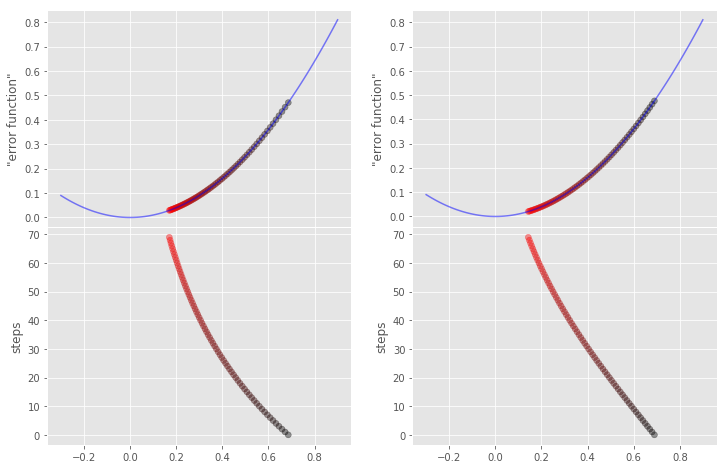

In [10]:
from mlp.learning_rules import *

x0 = 0.7
xx = np.linspace(-.3, .9, 100)
fn = lambda x: x**2
grad_fn = lambda x: 2*x
S = 70

def plot_learning(ax0, ax1, learning_rule):
    params = [np.array((x0))]
    learning_rule.initialise(params)
    ax0.plot(xx, fn(xx), c='blue', alpha=0.5)
    p_t, ff_t, c_t = np.empty(S), np.empty(S), [None] * S
    
    for s in range(S):
        learning_rule.update_params([grad_fn(p) for p in params])
        c_t[s] = (s/S, 0, 0)
        p_t[s] = params[0]
        ff_t[s] = fn(params[0])

    ax0.scatter(p_t, ff_t, c=c_t, alpha=0.4)
    ax1.scatter(p_t, np.arange(S), c=c_t, alpha=0.4)
    ax0.set_ylabel('"error function"')
    ax1.set_ylabel('steps')

plt.clf()
f, axarr = plt.subplots(2, 2, sharex='col')
f.subplots_adjust(hspace=0)

plot_learning(axarr[0,0], axarr[1,0], GradientDescentLearningRule(learning_rate=1e-2))
plot_learning(axarr[0,1], axarr[1,1], AdamLearningRule(learning_rate=1e-2))

plt.gcf().set_size_inches((12,8))
plt.show()

Batch!!!!

A Jupyter Widget

A Jupyter Widget

Epoch 1: 4.6s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 2: 4.9s to complete
    error(train)=1.08e-01, acc(train)=9.57e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 3: 6.5s to complete
    error(train)=1.04e-01, acc(train)=9.59e-01, error(valid)=1.20e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 4: 4.2s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 5: 3.0s to complete
    error(train)=9.99e-02, acc(train)=9.61e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 6: 3.1s to complete
    error(train)=9.84e-02, acc(train)=9.61e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 7: 3.3s to complete
    error(train)=9.73e-02, acc(train)=9.62e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 8: 3.0s to complete
    error(train)=9.65e-02, acc(train)=9.62e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 9: 5.0s to complete
    error(train)=9.57e-02, acc(train)=9.62e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 10: 3.5s to complete
    error(train)=9.51e-02, acc(train)=9.63e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 11: 3.0s to complete
    error(train)=9.45e-02, acc(train)=9.63e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 12: 3.3s to complete
    error(train)=9.40e-02, acc(train)=9.63e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 13: 3.0s to complete
    error(train)=9.36e-02, acc(train)=9.63e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 14: 2.9s to complete
    error(train)=9.32e-02, acc(train)=9.64e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 15: 3.0s to complete
    error(train)=9.27e-02, acc(train)=9.64e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 16: 3.0s to complete
    error(train)=9.24e-02, acc(train)=9.64e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 17: 3.0s to complete
    error(train)=9.20e-02, acc(train)=9.64e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 18: 3.0s to complete
    error(train)=9.18e-02, acc(train)=9.65e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 19: 4.0s to complete
    error(train)=9.15e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 20: 3.0s to complete
    error(train)=9.13e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 21: 3.0s to complete
    error(train)=9.10e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 22: 3.4s to complete
    error(train)=9.08e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 23: 3.5s to complete
    error(train)=9.06e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 24: 4.4s to complete
    error(train)=9.04e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 25: 4.0s to complete
    error(train)=9.02e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 26: 4.8s to complete
    error(train)=9.01e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 27: 4.1s to complete
    error(train)=8.97e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 28: 4.9s to complete
    error(train)=8.97e-02, acc(train)=9.65e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 29: 4.1s to complete
    error(train)=8.94e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 30: 3.5s to complete
    error(train)=8.92e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 31: 3.3s to complete
    error(train)=8.91e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 32: 3.8s to complete
    error(train)=8.90e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 33: 4.4s to complete
    error(train)=8.89e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 34: 4.5s to complete
    error(train)=8.88e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 35: 3.0s to complete
    error(train)=8.85e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 36: 4.2s to complete
    error(train)=8.84e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 37: 3.0s to complete
    error(train)=8.83e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 38: 3.0s to complete
    error(train)=8.81e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 39: 3.1s to complete
    error(train)=8.81e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 40: 3.0s to complete
    error(train)=8.81e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 41: 4.5s to complete
    error(train)=8.78e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 42: 3.4s to complete
    error(train)=8.78e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 43: 4.2s to complete
    error(train)=8.77e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 44: 3.3s to complete
    error(train)=8.76e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.12e-01


A Jupyter Widget

Epoch 45: 4.4s to complete
    error(train)=8.74e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 46: 4.0s to complete
    error(train)=8.73e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 47: 3.5s to complete
    error(train)=8.72e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 48: 3.0s to complete
    error(train)=8.70e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 49: 3.0s to complete
    error(train)=8.70e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 50: 3.0s to complete
    error(train)=8.70e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 51: 3.1s to complete
    error(train)=8.67e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 52: 3.0s to complete
    error(train)=8.67e-02, acc(train)=9.66e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 53: 3.1s to complete
    error(train)=8.66e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 54: 3.0s to complete
    error(train)=8.65e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 55: 3.0s to complete
    error(train)=8.64e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 56: 3.0s to complete
    error(train)=8.64e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 57: 3.1s to complete
    error(train)=8.63e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 58: 3.0s to complete
    error(train)=8.62e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 59: 3.0s to complete
    error(train)=8.61e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 60: 3.0s to complete
    error(train)=8.60e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 61: 3.0s to complete
    error(train)=8.60e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 62: 3.1s to complete
    error(train)=8.59e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 63: 3.0s to complete
    error(train)=8.58e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 64: 3.0s to complete
    error(train)=8.57e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 65: 3.0s to complete
    error(train)=8.57e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 66: 2.9s to complete
    error(train)=8.56e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 67: 3.6s to complete
    error(train)=8.55e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 68: 3.3s to complete
    error(train)=8.55e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 69: 3.3s to complete
    error(train)=8.54e-02, acc(train)=9.67e-01, error(valid)=1.20e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 70: 3.5s to complete
    error(train)=8.53e-02, acc(train)=9.67e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 71: 3.3s to complete
    error(train)=8.52e-02, acc(train)=9.67e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 72: 3.2s to complete
    error(train)=8.52e-02, acc(train)=9.67e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 73: 3.2s to complete
    error(train)=8.52e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 74: 3.2s to complete
    error(train)=8.50e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 75: 3.3s to complete
    error(train)=8.50e-02, acc(train)=9.67e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 76: 3.0s to complete
    error(train)=8.49e-02, acc(train)=9.67e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 77: 3.1s to complete
    error(train)=8.49e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 78: 3.0s to complete
    error(train)=8.48e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 79: 3.0s to complete
    error(train)=8.48e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 80: 3.0s to complete
    error(train)=8.47e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 81: 3.0s to complete
    error(train)=8.46e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 82: 3.0s to complete
    error(train)=8.45e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 83: 3.0s to complete
    error(train)=8.45e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 84: 3.2s to complete
    error(train)=8.46e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 85: 3.1s to complete
    error(train)=8.44e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 86: 3.1s to complete
    error(train)=8.43e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 87: 3.0s to complete
    error(train)=8.43e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 88: 3.0s to complete
    error(train)=8.42e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 89: 2.9s to complete
    error(train)=8.42e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 90: 3.1s to complete
    error(train)=8.41e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 91: 3.0s to complete
    error(train)=8.41e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 92: 3.0s to complete
    error(train)=8.41e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 93: 3.0s to complete
    error(train)=8.41e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 94: 3.6s to complete
    error(train)=8.39e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 95: 3.1s to complete
    error(train)=8.38e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 96: 3.0s to complete
    error(train)=8.38e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 97: 3.2s to complete
    error(train)=8.37e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 98: 3.1s to complete
    error(train)=8.38e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


A Jupyter Widget

Epoch 99: 3.1s to complete
    error(train)=8.37e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.14e-01


A Jupyter Widget

Epoch 100: 3.1s to complete
    error(train)=8.36e-02, acc(train)=9.68e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


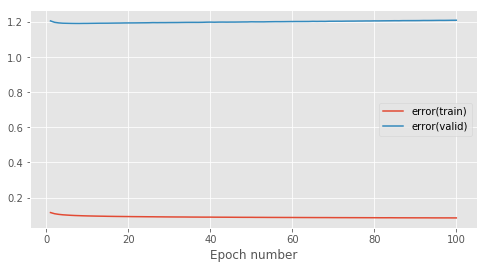

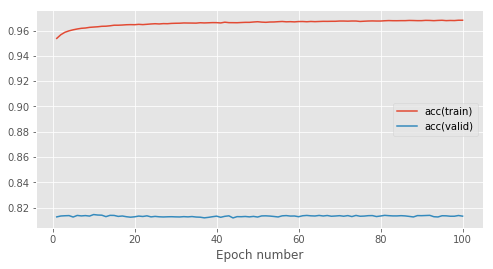

In [11]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer,BatchNormalizationLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model_layer_BN = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    BatchNormalizationLayer(hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    BatchNormalizationLayer(hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

Batch with RMSProp

A Jupyter Widget

A Jupyter Widget

Epoch 1: 3.5s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=1.28e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 2: 3.6s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=1.27e+00, acc(valid)=8.09e-01


A Jupyter Widget

Epoch 3: 3.5s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=1.31e+00, acc(valid)=8.05e-01


A Jupyter Widget

Epoch 4: 3.6s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.28e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 5: 3.5s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.34e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 6: 3.6s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.37e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 7: 3.4s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.35e+00, acc(valid)=8.05e-01


A Jupyter Widget

Epoch 8: 3.5s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.36e+00, acc(valid)=8.07e-01


A Jupyter Widget

Epoch 9: 3.7s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.39e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 10: 4.9s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.39e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 11: 3.5s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.38e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 12: 3.6s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.41e+00, acc(valid)=8.08e-01


A Jupyter Widget

Epoch 13: 3.5s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.42e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 14: 6.0s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=1.42e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 15: 4.9s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=1.47e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 16: 5.4s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.45e+00, acc(valid)=8.03e-01


A Jupyter Widget

Epoch 17: 4.9s to complete
    error(train)=1.21e-01, acc(train)=9.51e-01, error(valid)=1.48e+00, acc(valid)=8.03e-01


A Jupyter Widget

Epoch 18: 5.3s to complete
    error(train)=1.29e-01, acc(train)=9.46e-01, error(valid)=1.50e+00, acc(valid)=8.03e-01


A Jupyter Widget

Epoch 19: 5.1s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.47e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 20: 4.7s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.51e+00, acc(valid)=8.05e-01


A Jupyter Widget

Epoch 21: 4.4s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.51e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 22: 5.4s to complete
    error(train)=1.33e-01, acc(train)=9.47e-01, error(valid)=1.54e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 23: 4.3s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.55e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 24: 5.7s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.56e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 25: 3.8s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.59e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 26: 6.3s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.57e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 27: 4.8s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.62e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 28: 5.4s to complete
    error(train)=1.27e-01, acc(train)=9.50e-01, error(valid)=1.61e+00, acc(valid)=8.03e-01


A Jupyter Widget

Epoch 29: 4.1s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=1.61e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 30: 3.7s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.67e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 31: 3.5s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.60e+00, acc(valid)=8.06e-01


A Jupyter Widget

Epoch 32: 3.5s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.68e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 33: 3.4s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.65e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 34: 3.3s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.70e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 35: 3.3s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.69e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 36: 3.5s to complete
    error(train)=1.05e-01, acc(train)=9.57e-01, error(valid)=1.65e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 37: 4.0s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.69e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 38: 3.4s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.72e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 39: 3.4s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.76e+00, acc(valid)=8.04e-01


A Jupyter Widget

Epoch 40: 3.7s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.75e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 41: 3.5s to complete
    error(train)=1.09e-01, acc(train)=9.55e-01, error(valid)=1.75e+00, acc(valid)=8.05e-01


A Jupyter Widget

Epoch 42: 3.5s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.76e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 43: 3.4s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=1.78e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 44: 3.4s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.80e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 45: 3.5s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.80e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 46: 3.5s to complete
    error(train)=9.92e-02, acc(train)=9.59e-01, error(valid)=1.80e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 47: 3.2s to complete
    error(train)=1.31e-01, acc(train)=9.48e-01, error(valid)=1.89e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 48: 3.4s to complete
    error(train)=1.28e-01, acc(train)=9.50e-01, error(valid)=1.87e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 49: 3.5s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.85e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 50: 3.6s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.85e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 51: 3.3s to complete
    error(train)=1.20e-01, acc(train)=9.53e-01, error(valid)=1.90e+00, acc(valid)=8.05e-01


A Jupyter Widget

Epoch 52: 3.6s to complete
    error(train)=1.08e-01, acc(train)=9.57e-01, error(valid)=1.89e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 53: 3.8s to complete
    error(train)=1.00e-01, acc(train)=9.60e-01, error(valid)=1.86e+00, acc(valid)=8.05e-01


A Jupyter Widget

Epoch 54: 3.6s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.92e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 55: 3.6s to complete
    error(train)=1.08e-01, acc(train)=9.56e-01, error(valid)=1.93e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 56: 3.7s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.94e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 57: 3.7s to complete
    error(train)=1.25e-01, acc(train)=9.51e-01, error(valid)=2.00e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 58: 3.4s to complete
    error(train)=1.01e-01, acc(train)=9.59e-01, error(valid)=1.91e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 59: 3.2s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.98e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 60: 3.3s to complete
    error(train)=1.26e-01, acc(train)=9.52e-01, error(valid)=2.00e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 61: 3.3s to complete
    error(train)=1.29e-01, acc(train)=9.48e-01, error(valid)=2.06e+00, acc(valid)=7.92e-01


A Jupyter Widget

Epoch 62: 3.3s to complete
    error(train)=1.18e-01, acc(train)=9.53e-01, error(valid)=1.99e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 63: 3.8s to complete
    error(train)=1.06e-01, acc(train)=9.58e-01, error(valid)=2.00e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 64: 3.4s to complete
    error(train)=9.82e-02, acc(train)=9.61e-01, error(valid)=2.02e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 65: 3.7s to complete
    error(train)=1.07e-01, acc(train)=9.57e-01, error(valid)=2.04e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 66: 3.4s to complete
    error(train)=9.79e-02, acc(train)=9.60e-01, error(valid)=2.05e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 67: 3.3s to complete
    error(train)=9.96e-02, acc(train)=9.60e-01, error(valid)=2.03e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 68: 3.4s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=2.08e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 69: 3.3s to complete
    error(train)=9.97e-02, acc(train)=9.60e-01, error(valid)=2.09e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 70: 3.3s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=2.12e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 71: 3.3s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=2.09e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 72: 3.3s to complete
    error(train)=8.88e-02, acc(train)=9.64e-01, error(valid)=2.08e+00, acc(valid)=8.03e-01


A Jupyter Widget

Epoch 73: 3.3s to complete
    error(train)=9.83e-02, acc(train)=9.60e-01, error(valid)=2.11e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 74: 3.3s to complete
    error(train)=1.00e-01, acc(train)=9.60e-01, error(valid)=2.14e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 75: 3.2s to complete
    error(train)=9.91e-02, acc(train)=9.60e-01, error(valid)=2.16e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 76: 3.4s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=2.16e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 77: 3.4s to complete
    error(train)=1.08e-01, acc(train)=9.57e-01, error(valid)=2.19e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 78: 3.6s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=2.18e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 79: 3.5s to complete
    error(train)=9.47e-02, acc(train)=9.60e-01, error(valid)=2.19e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 80: 3.4s to complete
    error(train)=9.80e-02, acc(train)=9.60e-01, error(valid)=2.17e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 81: 3.4s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=2.20e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 82: 3.4s to complete
    error(train)=1.03e-01, acc(train)=9.60e-01, error(valid)=2.25e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 83: 3.4s to complete
    error(train)=9.80e-02, acc(train)=9.61e-01, error(valid)=2.27e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 84: 3.4s to complete
    error(train)=9.99e-02, acc(train)=9.60e-01, error(valid)=2.23e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 85: 3.3s to complete
    error(train)=9.61e-02, acc(train)=9.62e-01, error(valid)=2.25e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 86: 3.4s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=2.27e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 87: 3.4s to complete
    error(train)=1.31e-01, acc(train)=9.51e-01, error(valid)=2.32e+00, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 88: 3.3s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=2.32e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 89: 4.0s to complete
    error(train)=1.07e-01, acc(train)=9.59e-01, error(valid)=2.32e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 90: 3.4s to complete
    error(train)=9.64e-02, acc(train)=9.62e-01, error(valid)=2.33e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 91: 3.6s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=2.34e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 92: 3.5s to complete
    error(train)=9.19e-02, acc(train)=9.63e-01, error(valid)=2.34e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 93: 3.4s to complete
    error(train)=1.09e-01, acc(train)=9.59e-01, error(valid)=2.37e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 94: 3.4s to complete
    error(train)=1.04e-01, acc(train)=9.60e-01, error(valid)=2.36e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 95: 3.4s to complete
    error(train)=7.98e-02, acc(train)=9.67e-01, error(valid)=2.34e+00, acc(valid)=8.03e-01


A Jupyter Widget

Epoch 96: 3.5s to complete
    error(train)=9.55e-02, acc(train)=9.63e-01, error(valid)=2.38e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 97: 3.7s to complete
    error(train)=9.51e-02, acc(train)=9.64e-01, error(valid)=2.37e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 98: 3.6s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=2.45e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 99: 3.7s to complete
    error(train)=1.04e-01, acc(train)=9.60e-01, error(valid)=2.41e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 100: 3.9s to complete
    error(train)=1.03e-01, acc(train)=9.60e-01, error(valid)=2.50e+00, acc(valid)=7.97e-01


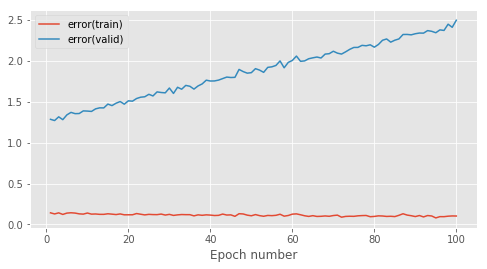

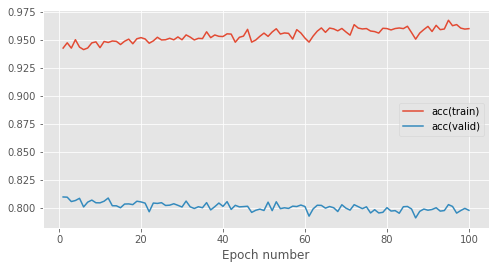

In [12]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer,BatchNormalizationLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
# learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model_layer_BN = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    BatchNormalizationLayer(hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    BatchNormalizationLayer(hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

batch with Adam

A Jupyter Widget

A Jupyter Widget

Epoch 1: 5.6s to complete
    error(train)=9.75e-02, acc(train)=9.63e-01, error(valid)=2.45e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 2: 4.9s to complete
    error(train)=1.04e-01, acc(train)=9.61e-01, error(valid)=2.43e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 3: 5.0s to complete
    error(train)=9.37e-02, acc(train)=9.63e-01, error(valid)=2.48e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 4: 4.8s to complete
    error(train)=1.04e-01, acc(train)=9.60e-01, error(valid)=2.43e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 5: 4.8s to complete
    error(train)=1.18e-01, acc(train)=9.56e-01, error(valid)=2.48e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 6: 4.8s to complete
    error(train)=1.01e-01, acc(train)=9.61e-01, error(valid)=2.45e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 7: 4.7s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=2.44e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 8: 4.7s to complete
    error(train)=1.16e-01, acc(train)=9.56e-01, error(valid)=2.48e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 9: 4.8s to complete
    error(train)=1.06e-01, acc(train)=9.60e-01, error(valid)=2.51e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 10: 4.8s to complete
    error(train)=1.11e-01, acc(train)=9.59e-01, error(valid)=2.53e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 11: 5.2s to complete
    error(train)=1.14e-01, acc(train)=9.56e-01, error(valid)=2.53e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 12: 5.0s to complete
    error(train)=1.11e-01, acc(train)=9.58e-01, error(valid)=2.50e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 13: 5.0s to complete
    error(train)=1.02e-01, acc(train)=9.60e-01, error(valid)=2.49e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 14: 4.7s to complete
    error(train)=9.88e-02, acc(train)=9.62e-01, error(valid)=2.53e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 15: 4.6s to complete
    error(train)=9.57e-02, acc(train)=9.62e-01, error(valid)=2.52e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 16: 4.8s to complete
    error(train)=1.06e-01, acc(train)=9.60e-01, error(valid)=2.53e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 17: 4.7s to complete
    error(train)=1.03e-01, acc(train)=9.60e-01, error(valid)=2.54e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 18: 4.6s to complete
    error(train)=1.36e-01, acc(train)=9.53e-01, error(valid)=2.64e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 19: 4.7s to complete
    error(train)=9.09e-02, acc(train)=9.64e-01, error(valid)=2.54e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 20: 4.8s to complete
    error(train)=1.09e-01, acc(train)=9.58e-01, error(valid)=2.61e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 21: 4.6s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=2.62e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 22: 4.8s to complete
    error(train)=9.96e-02, acc(train)=9.63e-01, error(valid)=2.58e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 23: 4.8s to complete
    error(train)=1.02e-01, acc(train)=9.61e-01, error(valid)=2.61e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 24: 4.7s to complete
    error(train)=1.27e-01, acc(train)=9.56e-01, error(valid)=2.66e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 25: 4.6s to complete
    error(train)=1.12e-01, acc(train)=9.59e-01, error(valid)=2.64e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 26: 4.7s to complete
    error(train)=1.02e-01, acc(train)=9.60e-01, error(valid)=2.58e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 27: 4.6s to complete
    error(train)=9.65e-02, acc(train)=9.63e-01, error(valid)=2.63e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 28: 4.7s to complete
    error(train)=8.78e-02, acc(train)=9.65e-01, error(valid)=2.58e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 29: 4.7s to complete
    error(train)=1.10e-01, acc(train)=9.59e-01, error(valid)=2.67e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 30: 4.8s to complete
    error(train)=1.07e-01, acc(train)=9.60e-01, error(valid)=2.62e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 31: 5.3s to complete
    error(train)=1.22e-01, acc(train)=9.57e-01, error(valid)=2.66e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 32: 5.5s to complete
    error(train)=9.36e-02, acc(train)=9.63e-01, error(valid)=2.67e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 33: 5.2s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=2.70e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 34: 5.1s to complete
    error(train)=9.04e-02, acc(train)=9.65e-01, error(valid)=2.66e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 35: 5.2s to complete
    error(train)=1.06e-01, acc(train)=9.60e-01, error(valid)=2.66e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 36: 4.8s to complete
    error(train)=9.80e-02, acc(train)=9.63e-01, error(valid)=2.66e+00, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 37: 4.6s to complete
    error(train)=9.27e-02, acc(train)=9.65e-01, error(valid)=2.72e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 38: 4.6s to complete
    error(train)=1.34e-01, acc(train)=9.55e-01, error(valid)=2.76e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 39: 4.6s to complete
    error(train)=9.85e-02, acc(train)=9.63e-01, error(valid)=2.70e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 40: 5.0s to complete
    error(train)=1.10e-01, acc(train)=9.59e-01, error(valid)=2.75e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 41: 4.9s to complete
    error(train)=1.08e-01, acc(train)=9.59e-01, error(valid)=2.73e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 42: 4.7s to complete
    error(train)=8.96e-02, acc(train)=9.65e-01, error(valid)=2.71e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 43: 4.7s to complete
    error(train)=9.48e-02, acc(train)=9.65e-01, error(valid)=2.77e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 44: 4.7s to complete
    error(train)=9.57e-02, acc(train)=9.63e-01, error(valid)=2.77e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 45: 4.6s to complete
    error(train)=8.91e-02, acc(train)=9.65e-01, error(valid)=2.81e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 46: 4.7s to complete
    error(train)=1.01e-01, acc(train)=9.61e-01, error(valid)=2.78e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 47: 4.8s to complete
    error(train)=1.05e-01, acc(train)=9.61e-01, error(valid)=2.77e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 48: 4.8s to complete
    error(train)=1.12e-01, acc(train)=9.59e-01, error(valid)=2.86e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 49: 4.6s to complete
    error(train)=1.14e-01, acc(train)=9.58e-01, error(valid)=2.84e+00, acc(valid)=7.90e-01


A Jupyter Widget

Epoch 50: 5.3s to complete
    error(train)=1.05e-01, acc(train)=9.62e-01, error(valid)=2.82e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 51: 5.1s to complete
    error(train)=1.01e-01, acc(train)=9.62e-01, error(valid)=2.83e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 52: 4.8s to complete
    error(train)=1.08e-01, acc(train)=9.60e-01, error(valid)=2.82e+00, acc(valid)=7.93e-01


A Jupyter Widget

Epoch 53: 5.3s to complete
    error(train)=8.63e-02, acc(train)=9.66e-01, error(valid)=2.81e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 54: 4.9s to complete
    error(train)=1.22e-01, acc(train)=9.58e-01, error(valid)=2.88e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 55: 4.7s to complete
    error(train)=1.12e-01, acc(train)=9.60e-01, error(valid)=2.82e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 56: 4.7s to complete
    error(train)=8.82e-02, acc(train)=9.66e-01, error(valid)=2.88e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 57: 4.8s to complete
    error(train)=8.88e-02, acc(train)=9.67e-01, error(valid)=2.83e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 58: 4.8s to complete
    error(train)=9.34e-02, acc(train)=9.65e-01, error(valid)=2.85e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 59: 4.9s to complete
    error(train)=1.02e-01, acc(train)=9.62e-01, error(valid)=2.90e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 60: 4.8s to complete
    error(train)=1.02e-01, acc(train)=9.61e-01, error(valid)=2.87e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 61: 4.9s to complete
    error(train)=8.21e-02, acc(train)=9.68e-01, error(valid)=2.86e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 62: 5.0s to complete
    error(train)=8.99e-02, acc(train)=9.66e-01, error(valid)=2.87e+00, acc(valid)=8.01e-01


A Jupyter Widget

Epoch 63: 4.8s to complete
    error(train)=9.72e-02, acc(train)=9.64e-01, error(valid)=2.96e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 64: 4.8s to complete
    error(train)=8.85e-02, acc(train)=9.65e-01, error(valid)=2.91e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 65: 5.6s to complete
    error(train)=8.13e-02, acc(train)=9.68e-01, error(valid)=2.87e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 66: 6.1s to complete
    error(train)=1.19e-01, acc(train)=9.59e-01, error(valid)=3.00e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 67: 5.1s to complete
    error(train)=1.08e-01, acc(train)=9.62e-01, error(valid)=2.93e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 68: 5.2s to complete
    error(train)=8.24e-02, acc(train)=9.67e-01, error(valid)=2.91e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 69: 5.6s to complete
    error(train)=9.54e-02, acc(train)=9.63e-01, error(valid)=2.98e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 70: 5.7s to complete
    error(train)=9.18e-02, acc(train)=9.66e-01, error(valid)=2.95e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 71: 4.9s to complete
    error(train)=9.34e-02, acc(train)=9.65e-01, error(valid)=2.99e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 72: 5.0s to complete
    error(train)=1.06e-01, acc(train)=9.60e-01, error(valid)=2.98e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 73: 4.9s to complete
    error(train)=9.62e-02, acc(train)=9.64e-01, error(valid)=3.01e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 74: 5.3s to complete
    error(train)=9.29e-02, acc(train)=9.67e-01, error(valid)=3.00e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 75: 5.1s to complete
    error(train)=8.77e-02, acc(train)=9.66e-01, error(valid)=3.05e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 76: 4.9s to complete
    error(train)=8.17e-02, acc(train)=9.69e-01, error(valid)=2.94e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 77: 4.8s to complete
    error(train)=9.23e-02, acc(train)=9.65e-01, error(valid)=3.03e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 78: 4.8s to complete
    error(train)=9.44e-02, acc(train)=9.64e-01, error(valid)=3.03e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 79: 5.0s to complete
    error(train)=9.44e-02, acc(train)=9.65e-01, error(valid)=3.02e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 80: 4.8s to complete
    error(train)=1.20e-01, acc(train)=9.59e-01, error(valid)=3.07e+00, acc(valid)=7.91e-01


A Jupyter Widget

Epoch 81: 4.9s to complete
    error(train)=9.71e-02, acc(train)=9.65e-01, error(valid)=3.08e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 82: 4.8s to complete
    error(train)=1.11e-01, acc(train)=9.60e-01, error(valid)=3.07e+00, acc(valid)=7.90e-01


A Jupyter Widget

Epoch 83: 4.8s to complete
    error(train)=1.01e-01, acc(train)=9.63e-01, error(valid)=3.09e+00, acc(valid)=7.92e-01


A Jupyter Widget

Epoch 84: 4.8s to complete
    error(train)=7.92e-02, acc(train)=9.70e-01, error(valid)=3.02e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 85: 4.8s to complete
    error(train)=8.72e-02, acc(train)=9.67e-01, error(valid)=3.09e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 86: 4.9s to complete
    error(train)=8.64e-02, acc(train)=9.66e-01, error(valid)=3.08e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 87: 5.0s to complete
    error(train)=9.33e-02, acc(train)=9.65e-01, error(valid)=3.08e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 88: 5.0s to complete
    error(train)=1.22e-01, acc(train)=9.58e-01, error(valid)=3.16e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 89: 4.9s to complete
    error(train)=8.88e-02, acc(train)=9.66e-01, error(valid)=3.06e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 90: 4.9s to complete
    error(train)=9.82e-02, acc(train)=9.64e-01, error(valid)=3.09e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 91: 4.8s to complete
    error(train)=8.85e-02, acc(train)=9.66e-01, error(valid)=3.12e+00, acc(valid)=7.95e-01


A Jupyter Widget

Epoch 92: 4.8s to complete
    error(train)=9.82e-02, acc(train)=9.63e-01, error(valid)=3.17e+00, acc(valid)=7.96e-01


A Jupyter Widget

Epoch 93: 4.8s to complete
    error(train)=8.41e-02, acc(train)=9.68e-01, error(valid)=3.09e+00, acc(valid)=7.97e-01


A Jupyter Widget

Epoch 94: 4.8s to complete
    error(train)=9.52e-02, acc(train)=9.64e-01, error(valid)=3.12e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 95: 4.8s to complete
    error(train)=1.03e-01, acc(train)=9.63e-01, error(valid)=3.15e+00, acc(valid)=7.92e-01


A Jupyter Widget

Epoch 96: 4.8s to complete
    error(train)=8.61e-02, acc(train)=9.67e-01, error(valid)=3.13e+00, acc(valid)=7.99e-01


A Jupyter Widget

Epoch 97: 4.9s to complete
    error(train)=1.20e-01, acc(train)=9.60e-01, error(valid)=3.20e+00, acc(valid)=7.94e-01


A Jupyter Widget

Epoch 98: 5.2s to complete
    error(train)=9.12e-02, acc(train)=9.67e-01, error(valid)=3.18e+00, acc(valid)=8.00e-01


A Jupyter Widget

Epoch 99: 5.1s to complete
    error(train)=1.04e-01, acc(train)=9.64e-01, error(valid)=3.27e+00, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 100: 5.9s to complete
    error(train)=8.98e-02, acc(train)=9.67e-01, error(valid)=3.20e+00, acc(valid)=7.96e-01


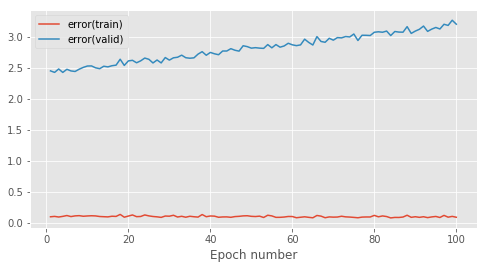

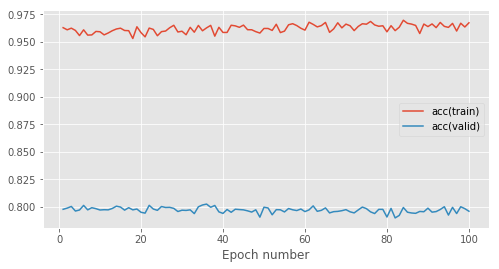

In [13]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer,BatchNormalizationLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
# learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model_layer_BN = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    BatchNormalizationLayer(hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    BatchNormalizationLayer(hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)